# setting the working directory

In [1]:
import os as os 

In [2]:
os.chdir('C:\\Users\\MyPC\\Desktop\\Project 12 SVM on Bank Credit card')

In [3]:
os.getcwd()

'C:\\Users\\MyPC\\Desktop\\Project 12 SVM on Bank Credit card'

In [4]:
os.listdir()

['BankCreditCard.csv',
 'Log_ROC.png',
 'mariral_vs_pur_stack.png',
 'Problem Statement.docx']

# Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)

# Load Data

In [6]:
df_credit_card = pd.read_csv('BankCreditCard.csv')

In [7]:
df_credit_card.head()  



,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [8]:
# columns in the datset 
df_credit_card.columns

Index(['Customer ID', 'Credit_Amount', 'Gender', 'Academic_Qualification',
       'Marital', 'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount',
       'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan',
       'Previous_Payment_Feb', 'Previous_Payment_March',
       'Previous_Payment_April', 'Previous_Payment_May',
       'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

In [9]:
df_credit_card.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

Remove "Customer ID" Since all the values are unique and does not contribute any information for analysis

In [10]:
# drop customer id column
df_credit_card.drop("Customer ID",axis=1, inplace=True);

# Exploratory data analysis

Lets have look at the Default payment,Gender,Academic Qualification,Marital Demographics of the data.

# Default payment

In [11]:
# count each category in the default payment variable
df_credit_card['Default_Payment'].value_counts()



0    23364
1     6636
Name: Default_Payment, dtype: int64

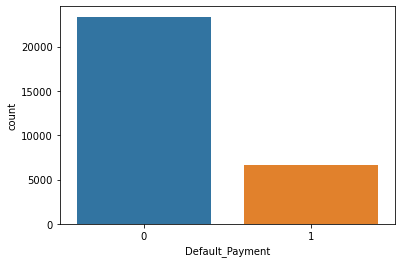

In [12]:
sns.countplot(x='Default_Payment',data=df_credit_card)

plt.show()

# Gender

In [13]:
df_credit_card['Gender'].value_counts()

2    18112
1    11888
Name: Gender, dtype: int64

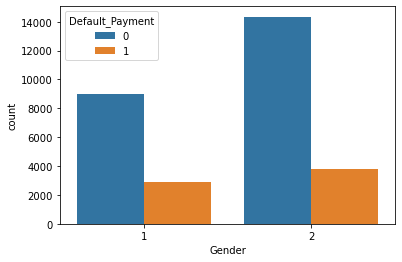

In [14]:
sns.countplot(x='Gender',hue='Default_Payment',data=df_credit_card);
plt.show()


There are 11888 male and 18112 female credit card holders.

The number of female credit card holders are higher than the number of male credit card holders.

# Academic Qualifications

In [15]:
df_credit_card['Academic_Qualification'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       65
Name: Academic_Qualification, dtype: int64

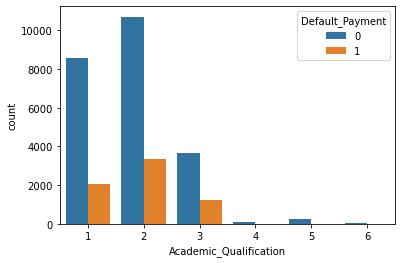

In [16]:
sns.countplot(x='Academic_Qualification',hue='Default_Payment',data=df_credit_card);
plt.show()


1=Undergraduate, 2=Graduate, 3=Postgraduate, 4=Professional, 5=Others, 6=Unknown

The above plot shows most of the credit card holders are students.

# Marital

In [17]:
df_credit_card['Marital'].value_counts()

2    15964
1    13659
3      323
0       54
Name: Marital, dtype: int64

1=Married, 2=Single, 3=Do not prefer to say, 4=no information

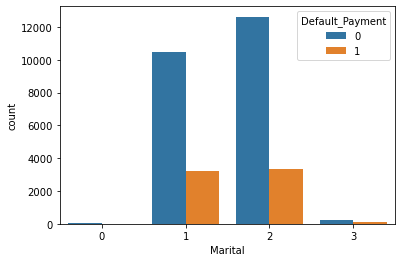

In [18]:
sns.countplot(x='Marital',hue='Default_Payment',data=df_credit_card);
plt.show()

# Compare "Academic Qualification" with "Default Payment"

Text(0, 0.5, 'Default Payment')

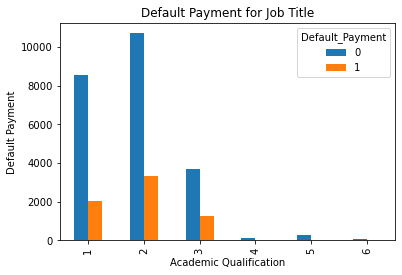

In [19]:
%matplotlib inline
pd.crosstab(df_credit_card.Academic_Qualification,df_credit_card.Default_Payment).plot(kind='bar')
plt.title('Default Payment for Job Title')
plt.xlabel('Academic Qualification')
plt.ylabel('Default Payment')

# Compare "Academic Qualification" and "Marital"

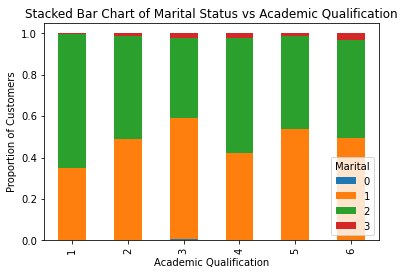

In [20]:
table= pd.crosstab(df_credit_card.Academic_Qualification,df_credit_card.Marital)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Academic Qualification')
plt.xlabel('Academic Qualification')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

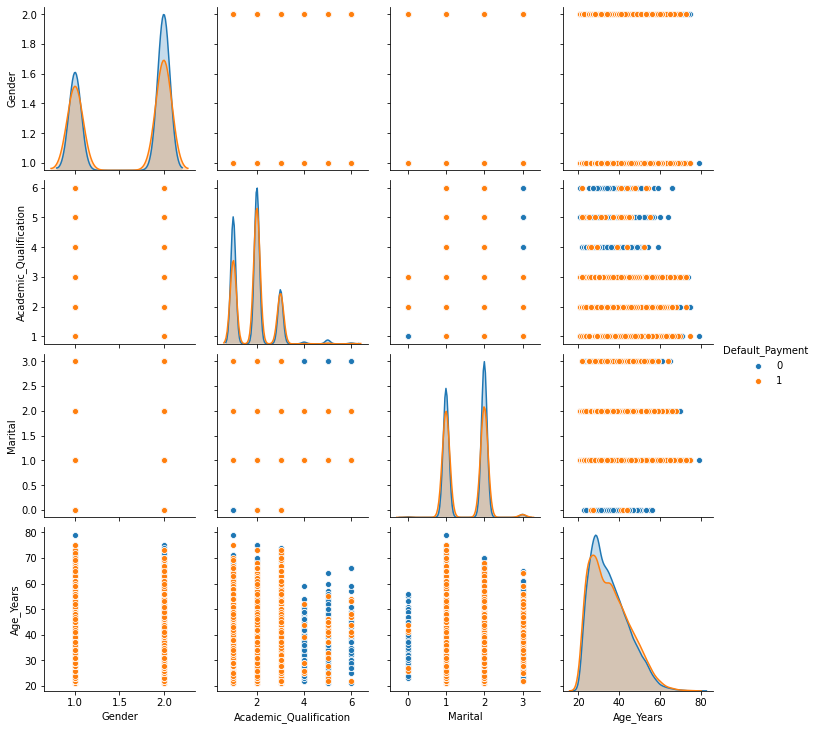

In [21]:
sns.pairplot(df_credit_card.iloc[:,[1,2,3,4,23]], diag_kind="kde",hue="Default_Payment")


# Correlation Matrix

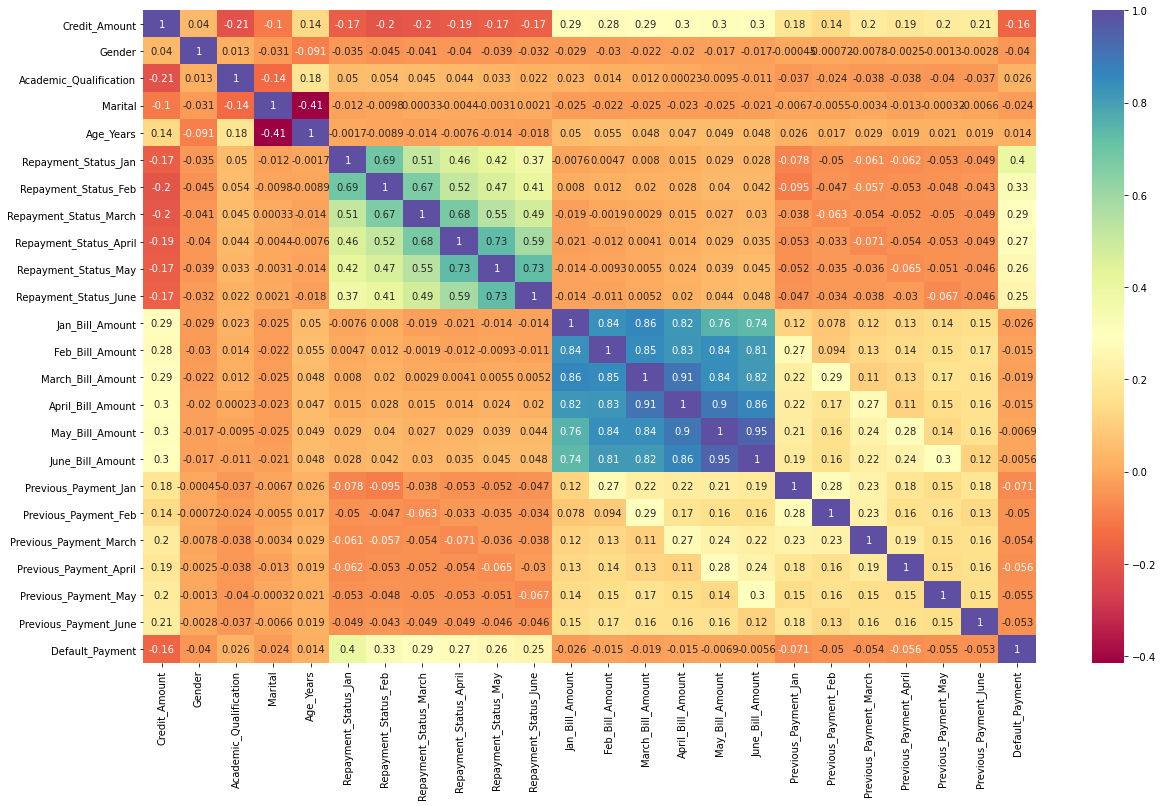

In [22]:
# calculating correlation among numeric variable
corr_matrix = df_credit_card.corr()

# plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,
           cmap='Spectral',
           annot=True);

The above result shows all independent variables are slightly correlated with target variable. But independent variables have
multicollinearity. For example: "March_Bill_Amount" is highly correlated with "April_Bill_Amount".

# Filtering the columns based correlation value

In [23]:
# create empty array
columns = np.full((corr_matrix.shape[0],), True, dtype=bool) 

# for loop to filter columns
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >=0.9:
            if columns[j]:
                columns[j] = False
               
# selected column store into a variable
selected_columns = df_credit_card.columns[columns]
df_with_filtered_columns = df_credit_card[selected_columns]


In [24]:
df_with_filtered_columns.columns  

Index(['Credit_Amount', 'Gender', 'Academic_Qualification', 'Marital',
       'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'May_Bill_Amount',
       'Previous_Payment_Jan', 'Previous_Payment_Feb',
       'Previous_Payment_March', 'Previous_Payment_April',
       'Previous_Payment_May', 'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

# Splitting the dataset into input and output

In [25]:
x= df_with_filtered_columns.drop('Default_Payment',axis=1)
y= df_with_filtered_columns.loc[:,'Default_Payment']

# Standardizing input variables

In [26]:
from sklearn.preprocessing import StandardScaler

# Standardized the dataset
sc_x = StandardScaler()
X_std = sc_x.fit_transform(x)

# Implementing Support Vector Classifier

Splitting input data into training and testing dataset

In [27]:
# import train and test split module from sklearn
from sklearn.model_selection import train_test_split

# split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X_std,y, test_size=0.3, random_state=0, stratify=y)



# Linear Kernel

Create the support vectory classifier model

In [28]:
from sklearn.svm import SVC

In [29]:
linear_svc = SVC(kernel='linear',C=1.0,random_state=42)


# Training the model

In [30]:
linear_svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [31]:
linear_svc.support_vectors_ 

array([[ 0.35591432,  0.81016074, -1.07748156, ..., -0.29980379,
        -0.11149369, -0.12046364],
       [ 0.4315078 ,  0.81016074, -1.07748156, ..., -0.29980379,
        -0.30967814, -0.29338206],
       [-1.23154867,  0.81016074,  0.18135662, ..., -0.24145308,
        -0.13309562, -0.12462628],
       ...,
       [-1.08036172,  0.81016074, -1.07748156, ..., -0.27056997,
        -0.28024772, -0.29338206],
       [ 0.05354042, -1.23432296, -1.07748156, ..., -0.00746558,
        -0.13309562, -0.29338206],
       [-0.77798782, -1.23432296,  1.4401948 , ..., -0.29980379,
        -0.30967814, -0.29338206]])

# Making Predictions

In [32]:
linear_svc_pred_test = linear_svc.predict(x_test) 

In [33]:
linear_svc_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(linear_svc.score(x_train,y_train)))

Accuracy of support vector classifier on test set: 0.82


In [35]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(linear_svc.score(x_test,y_test)))

Accuracy of support vector classifier on test set: 0.82


# Evaluating the Algorithm

Confusion matrix

In [36]:
# Import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix

# create confusion matrix table
confusion_matrix = confusion_matrix(y_test, linear_svc_pred_test)
print(confusion_matrix)


[[6662  347]
 [1272  719]]


# Classification report

In [37]:
# import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, linear_svc_pred_test))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



Compute precision,recall,F-measure and support

The precision is the ratio tp/(tp + fp) where tp is the number of true positive and fp the number of false positive. The 
precision is intuitively the ability of the classifier not to label as positive a sample that is nagative.

The recall is the ratio tp/(tp + fn) where tp is the number of true positive and fn the number of false nagative. The racall
is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighed harmonic mean of the precision and recall, where an F-beta score reaches
its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0

# Roc Curve (receiver operating characteristic curve)

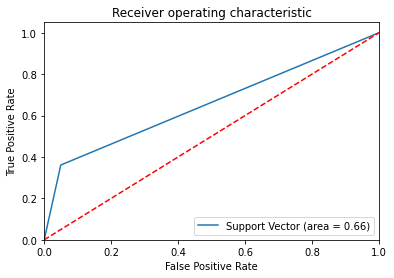

In [38]:
# Import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Prediction on test data based on the number of thresholds and calculate the false positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,linear_svc_pred_test)

roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

# plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Support Vector (area = %0.2f)' % roc_auc)

# diagnal dotted red line
plt.plot([0, 1], [0, 1], 'r--')  

# x-axis limitation
plt.xlim([0.0, 1.0])

# y-axis limitation
plt.ylim([0.0, 1.05])

# x-axis label
plt.xlabel('False Positive Rate')

# y-axis label
plt.ylabel('True Positive Rate')

# title for plot
plt.title('Receiver operating characteristic')

# print legend on lower right
plt.legend(loc="lower right")

# save the plot as a image
plt.savefig('Log_ROC')  

# print the plot
plt.show()




Roc curve is a plot of true positive rate versus false positive rate. The closer the curve follows the left-hand border and
then the top border of the ROC space, the more accurate the test. The area under the curve (AUC) is a measure of test accuracy
when AUC is 0.66, it means there is 66% chance that model will be able to distinguish between positive class and negative
class.

# Radial Basis Function Kernel

In [39]:
# SVC with RBF kernel
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=1.0)


In [40]:
rbf_svc.fit(x_train,y_train)

SVC(gamma=0.7)

In [41]:
rbf_svc.support_vectors_

array([[ 1.26303604e+00,  8.10160740e-01,  1.81356620e-01, ...,
         2.18804189e-01, -1.31329791e-01,  1.22783874e+00],
       [ 3.55914324e-01,  8.10160740e-01, -1.07748156e+00, ...,
        -2.99803790e-01, -1.11493688e-01, -1.20463641e-01],
       [ 5.07101276e-01,  8.10160740e-01, -1.07748156e+00, ...,
         4.46875858e+00,  1.92196427e+01,  2.69249693e-01],
       ...,
       [-1.08036172e+00,  8.10160740e-01, -1.07748156e+00, ...,
        -2.70569970e-01, -2.80247720e-01, -2.93382058e-01],
       [ 5.35404199e-02, -1.23432296e+00, -1.07748156e+00, ...,
        -7.46558307e-03, -1.33095616e-01, -2.93382058e-01],
       [-7.77987816e-01, -1.23432296e+00,  1.44019480e+00, ...,
        -2.99803790e-01, -3.09678140e-01, -2.93382058e-01]])

# Making Predictions

In [42]:
pred_test = rbf_svc.predict(x_test)

In [43]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(rbf_svc.score(x_train, y_train)))

# the accuracy has been increase

Accuracy of support vector classifier on test set: 0.88


In [44]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(rbf_svc.score(x_test, y_test)))

Accuracy of support vector classifier on test set: 0.80


Here it is fitting the training data well but not fitting equally well on the test data Because it has become more complex 
and it is able to do a better job on the training data but we are not able to generalize it that is the reason we dont get 
equally performace.

# Confusion matrix

In [45]:
# import confusion matrix form sklearn
from sklearn.metrics import confusion_matrix

# create confusion matrix table
confusion_matrix = confusion_matrix(y_test,pred_test)
print(confusion_matrix)

[[6799  210]
 [1617  374]]


True Negative is 6799 that means 6799 observations are correctly predicted as 0.

False Positive is 210 that means 210 observations are wrongly predicted as 1.

False Negative is 1617 that means 1617 observations are wronly predicted as 0.

True Positive is 374 that 374 observations are correctly predicted as 1.

# Classification report

In [46]:
# Import classification report from sklearn
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7009
           1       0.64      0.19      0.29      1991

    accuracy                           0.80      9000
   macro avg       0.72      0.58      0.59      9000
weighted avg       0.77      0.80      0.75      9000



# Lets learn about hyperparameters for SVM

C:
    It is the regularization parameter,C,of the error term.
    
kernel:
        It specifies the kernel type to be used in the algorithm. It can be 'linear','poly','rbf','sigmoid','precomputed',or 
        a callable. The default value is 'rbf'.
        
degree:
        It is the degree of the polynomial kernel function('poly') and is ignored by all other kernels. The default value is 3.
        
gamma:
        It is the kernel coefficient for 'rbf','poly','sigmoid'. If gamma is 'auto', then 1/n_features will be used instead.
        
coef0:
        Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.
        
shrinking:
            Whether to use the shrinking heuristic.
        
Probability:
              Whether to enable probability estimates. This must be enabled prior to calling fit, and will slow down that 
              method.
            
tol:
      Tolerance for stopping criterion.

# Training the model with grid search

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
model_grid_search = SVC(kernel='rbf')  # here we are using the kernel rbf.

In [49]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10],
             "gamma": [0.0001, 0.001, 0.01, 0.1, 1],
             }


# Create a model with grid search 

In [51]:
# ignore the deprecation warning
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Create grid search object
grid_search = GridSearchCV(model_grid_search, param_grid=param_grid)

grid_search.fit(x_train,y_train)

# it will taking so much time

KeyboardInterrupt: 

# Print best parameter values

In [54]:
# View the accuracy score
print('Best score for data1:',grid_search.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
# View the best parameters for the model found using grid search
print('Best C:',grid_search.best_estimator_.C)
print('Best n_iter:', grid_search.best_estimator_.gamma)


# Built a model using best parameters

In [52]:
model_grid = SVC(kernel='rbf',C=10, gamma=0.001)

# Training the model

In [53]:
# ignore the deprecation warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

model_grid.fit(x_train,y_train)


SVC(C=10, gamma=0.001)

# Making predictions

In [55]:
pred_test = model_grid.predict(x_test)

In [58]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(model_grid.score(x_train, y_train)))


Accuracy of support vector classifier on test set: 0.82


In [59]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(model_grid.score(x_test, y_test)))


Accuracy of support vector classifier on test set: 0.82


# Evaluating the algorithm

# Confusion matrix

In [60]:
# import confusion matrix form sklearn
from sklearn.metrics import confusion_matrix

# create confusion matrix table
confusion_matrix = confusion_matrix(y_test,pred_test)
print(confusion_matrix)

[[6712  297]
 [1320  671]]


# Classification report 

In [61]:
# Import classification report from sklearn
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7009
           1       0.69      0.34      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



# Polynomial Kernel

In [62]:
# SVC with polymial (degree 3) kernel
poly_svc = SVC(kernel='poly',degree=3, C=1.0)


In [64]:
# ignore the deprecation warning
warnings.filterwarnings("ignore",category=DeprecationWarning)

poly_svc.fit(x_train,y_train)

SVC(kernel='poly')

# Making Prediction

In [65]:
pred_test = poly_svc.predict(x_test)

In [66]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(poly_svc.score(x_train, y_train)))

Accuracy of support vector classifier on test set: 0.83


In [68]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(poly_svc.score(x_test, y_test)))

Accuracy of support vector classifier on test set: 0.81
